In [2]:
pip install pandas matplotlib seaborn jupyter notebook

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached fqdn-1.5.1-py3-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Setup complete!")

Setup complete!


In [6]:
# Load cleaned data
df = pd.read_csv('C:/Users/48666/Desktop/social_media_analysis/data/social_media_usage.csv')

In [7]:
#Initial exploration

print("Top 3 rows:")
print(df.head(3))
print("\nSummary statistics:")
print(df.describe())

Top 3 rows:
  User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0     U_1  Pinterest                  288             16             94   
1     U_2   Facebook                  192             14            117   
2     U_3  Instagram                  351             13            120   

   Follows_Per_Day  
0                0  
1               15  
2               48  

Summary statistics:
       Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day
count          1000.000000    1000.000000    1000.000000      1000.000000
mean            247.368000      10.269000      94.682000        24.698000
std             146.371921       6.121774      57.560943        14.842948
min               5.000000       0.000000       0.000000         0.000000
25%             112.750000       5.000000      44.750000        12.000000
50%             246.000000      10.000000      94.000000        24.000000
75%             380.500000      16.000000     142.000000        

C:\Users\48666\AppData\Local\Temp\ipykernel_15624\1391837530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='App', y='Daily_Minutes_Spent', palette='viridis')


FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/time_spent.png'

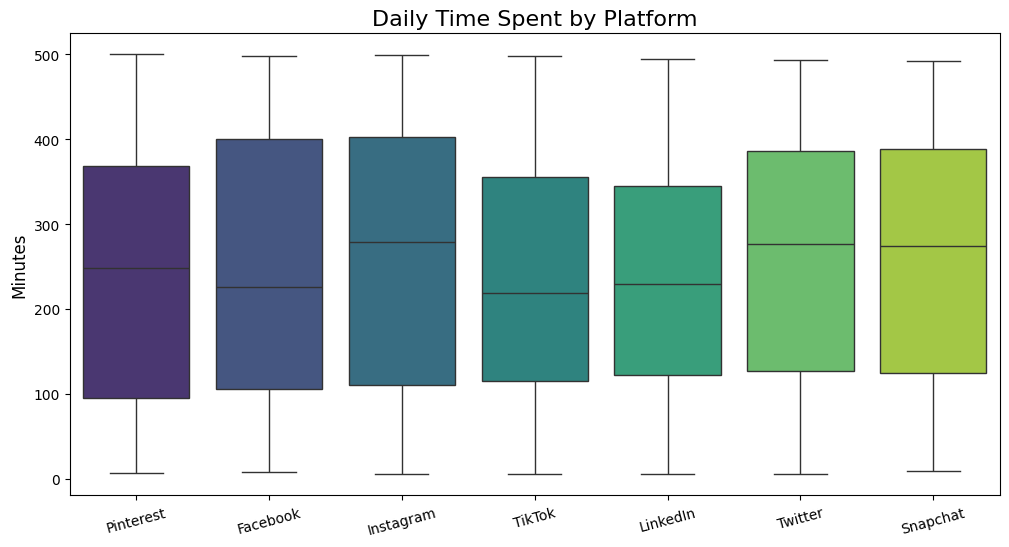

In [8]:
#Time spent analysis

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='App', y='Daily_Minutes_Spent', palette='viridis')
plt.title('Daily Time Spent by Platform', fontsize=16)
plt.xlabel('')
plt.ylabel('Minutes', fontsize=12)
plt.xticks(rotation=15)
plt.savefig('visualizations/time_spent.png', dpi=300)

C:\Users\48666\AppData\Local\Temp\ipykernel_15624\2905545773.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='App', y=metric,
C:\Users\48666\AppData\Local\Temp\ipykernel_15624\2905545773.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='App', y=metric,
C:\Users\48666\AppData\Local\Temp\ipykernel_15624\2905545773.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='App', y=metric,
C:\Users\48666\AppData\Local\Temp\ipykernel_15624\2905545773.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='App', y=metric,
C:\Users\486

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/engagement_comparison.png'

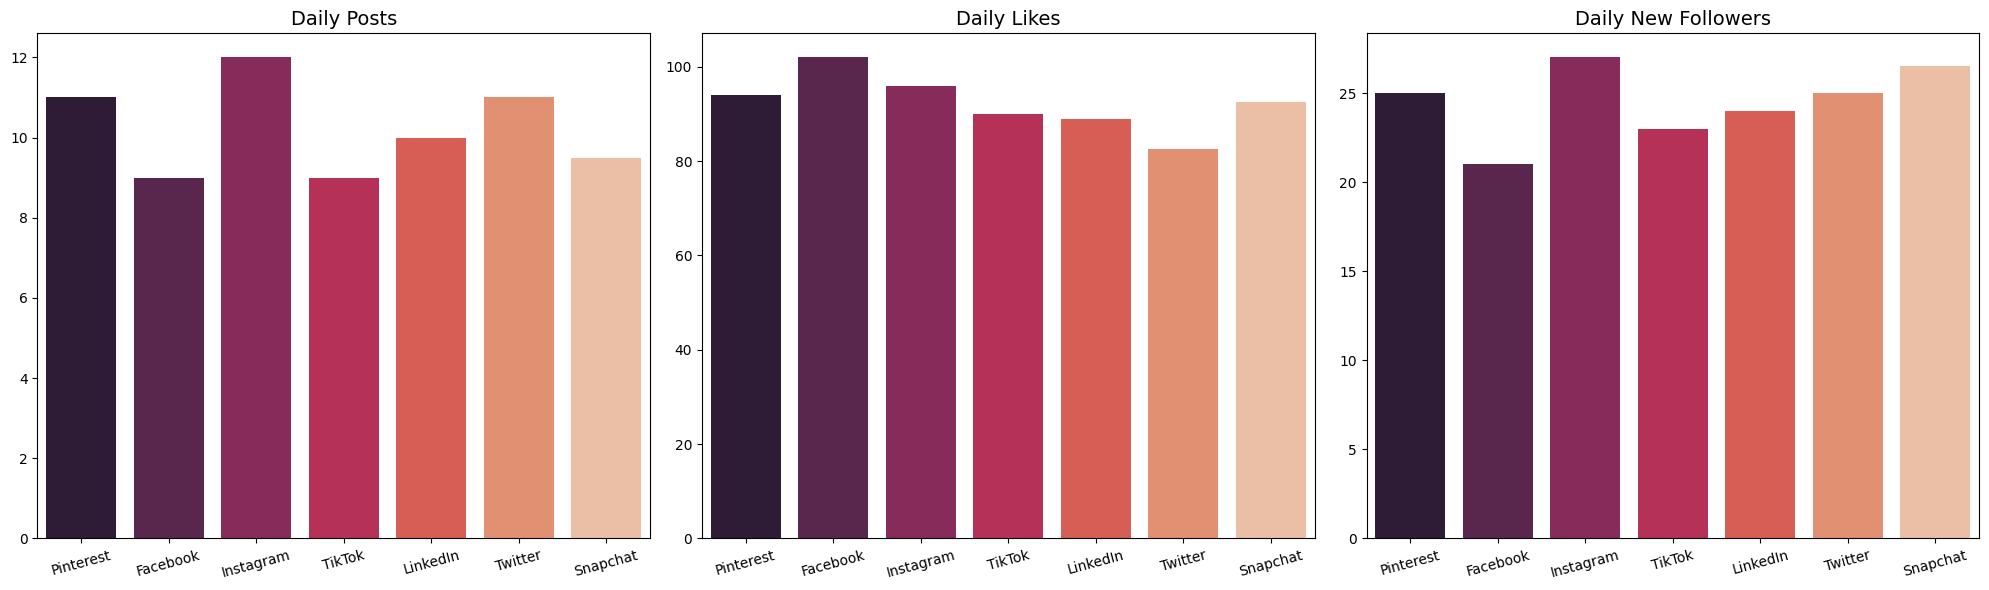

In [10]:
# Engagement metrics comparison
fig, axes = plt.subplots(1, 3, figsize=(20,6))
metrics = ['Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']
titles = ['Daily Posts', 'Daily Likes', 'Daily New Followers']

for i, metric in enumerate(metrics):
    sns.barplot(data=df, x='App', y=metric, 
                estimator=np.median, ci=None, 
                ax=axes[i], palette='rocket')
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('visualizations/engagement_comparison.png', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/correlation_matrix.png'

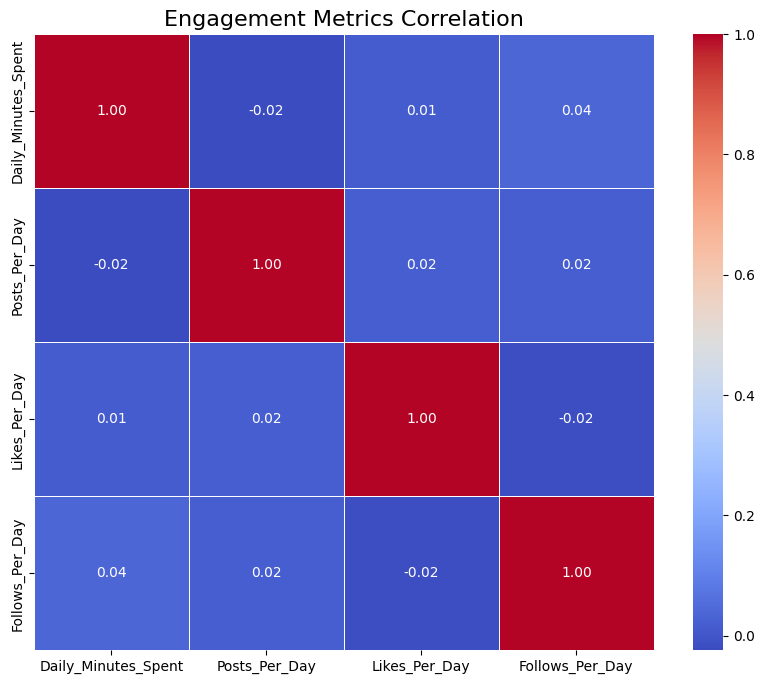

In [12]:
#Correlation analysis
corr_matrix = df[['Daily_Minutes_Spent', 'Posts_Per_Day', 
                 'Likes_Per_Day', 'Follows_Per_Day']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", 
            cmap='coolwarm', linewidths=0.5)
plt.title('Engagement Metrics Correlation', fontsize=16)
plt.savefig('visualizations/correlation_matrix.png', dpi=300)

In [13]:
#Key insights calculation
time_leader = df.groupby('App')['Daily_Minutes_Spent'].median().idxmax()
post_leader = df.groupby('App')['Posts_Per_Day'].median().idxmax()
engagement_leader = df.groupby('App')['Likes_Per_Day'].median().idxmax()

print(f"""
📊 Key Insights:
1. Most time spent: {time_leader} ({df[df['App']==time_leader]['Daily_Minutes_Spent'].median():.0f} min/day)
2. Most active posters: {post_leader} ({df[df['App']==post_leader]['Posts_Per_Day'].median():.1f} posts/day)
3. Highest engagement: {engagement_leader} ({df[df['App']==engagement_leader]['Likes_Per_Day'].median():.0f} likes/day)
4. Strongest correlation: Time spent vs Likes received (r={corr_matrix.loc['Daily_Minutes_Spent','Likes_Per_Day']:.2f})
""")


📊 Key Insights:
1. Most time spent: Instagram (278 min/day)
2. Most active posters: Instagram (12.0 posts/day)
3. Highest engagement: Facebook (102 likes/day)
4. Strongest correlation: Time spent vs Likes received (r=0.01)

